In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [17]:
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({"Salary":data})

In [18]:
df.head()

,Salary
0,2.032868
1,2.407042
2,0.934896
3,0.150031
4,1.677895


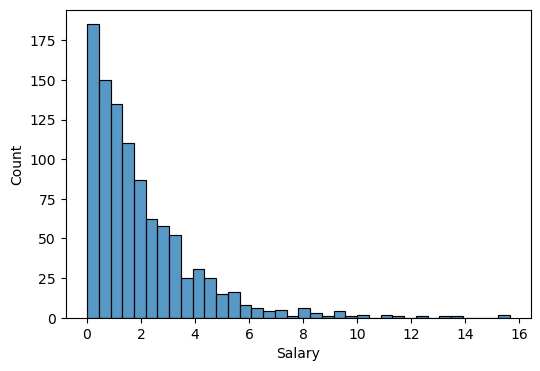

In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [20]:
df.Salary.skew()

2.352636299511132

In [21]:
df["Updated_Salary"], lambda_val = boxcox(df.Salary)

In [22]:
df.head()

,Salary,Updated_Salary
0,2.032868,0.774603
1,2.407042,0.979710
2,0.934896,-0.066770
3,0.150031,-1.518258
4,1.677895,0.551663


In [23]:
lambda_val

0.2441727926818369

In [24]:
df.Updated_Salary.skew()

-0.017251107071765737

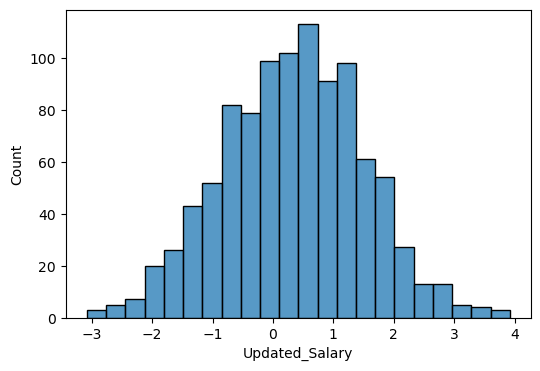

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df.Updated_Salary)
plt.show()

In [26]:
data = np.random.exponential(scale=2, size=1000)
data = 10 - data
df = pd.DataFrame({"Salary2": data})

In [29]:
df.head()

,Salary2
0,8.201570
1,9.721228
2,8.080880
3,8.495433
4,4.013894


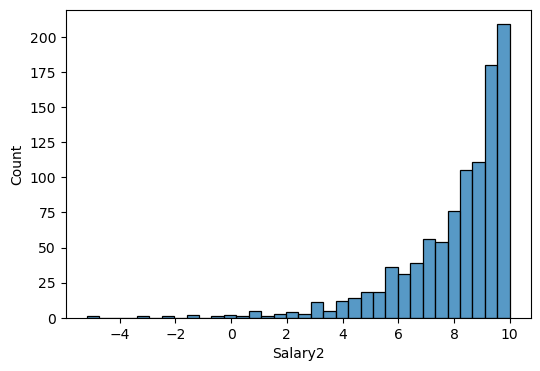

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [28]:
df.Salary2.skew()

-1.9868028437820433

In [29]:
df["reflex_salary"] = df.Salary2.max() - df.Salary2 +1

In [30]:
df.head()

,Salary2,reflex_salary
0,9.193131,1.806822
1,8.717195,2.282758
2,9.467438,1.532515
3,9.809559,1.190394
4,6.444471,4.555482


In [31]:
df["transformed_salary"] = np.log(df.reflex_salary)

In [32]:
df.transformed_salary.skew()

0.47871622606759495

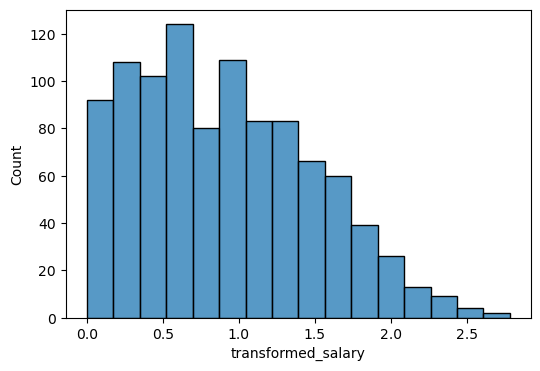

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df.transformed_salary)
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


In [35]:
data = pd.read_csv(r"C:\Users\keert\Downloads\test2 (1).csv")

In [36]:
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [37]:
data.shape

(6, 5)

In [38]:
data.Age = data.Age.fillna(value = data.Age.mean())
data.Salary = data.Salary.fillna(value = data.Salary.mean())

In [39]:
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,28.8,IT,62000.0
4,4,Eve,29.0,HR,58400.0
5,5,Alice,25.0,HR,50000.0


In [40]:
encoder = LabelEncoder()

In [41]:
data["transformed_name"] = encoder.fit_transform(data.Name)

In [42]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4


In [43]:
data[["Department"]].shape

(6, 1)

In [44]:
encoder2 = OneHotEncoder(sparse_output=False)

In [45]:
encoded = encoder2.fit_transform(data[["Department"]])

In [46]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [47]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [48]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [49]:
scaler = StandardScaler()

In [50]:
data["scaled_salary"] = scaler.fit_transform(data[["Salary"]])
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000


In [51]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [52]:
scaler = StandardScaler()

In [53]:
data["scaled_salary2"] = scaler.fit_transform(data[["Salary"]])

In [54]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary,scaled_salary2
0,0,Alice,25.0,HR,50000.0,0,-1.205755,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000,0.000000


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
data = pd.read_csv(r"C:\Users\keert\Downloads\data_visualization.csv")

In [85]:
data.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


<Figure size 640x480 with 0 Axes>

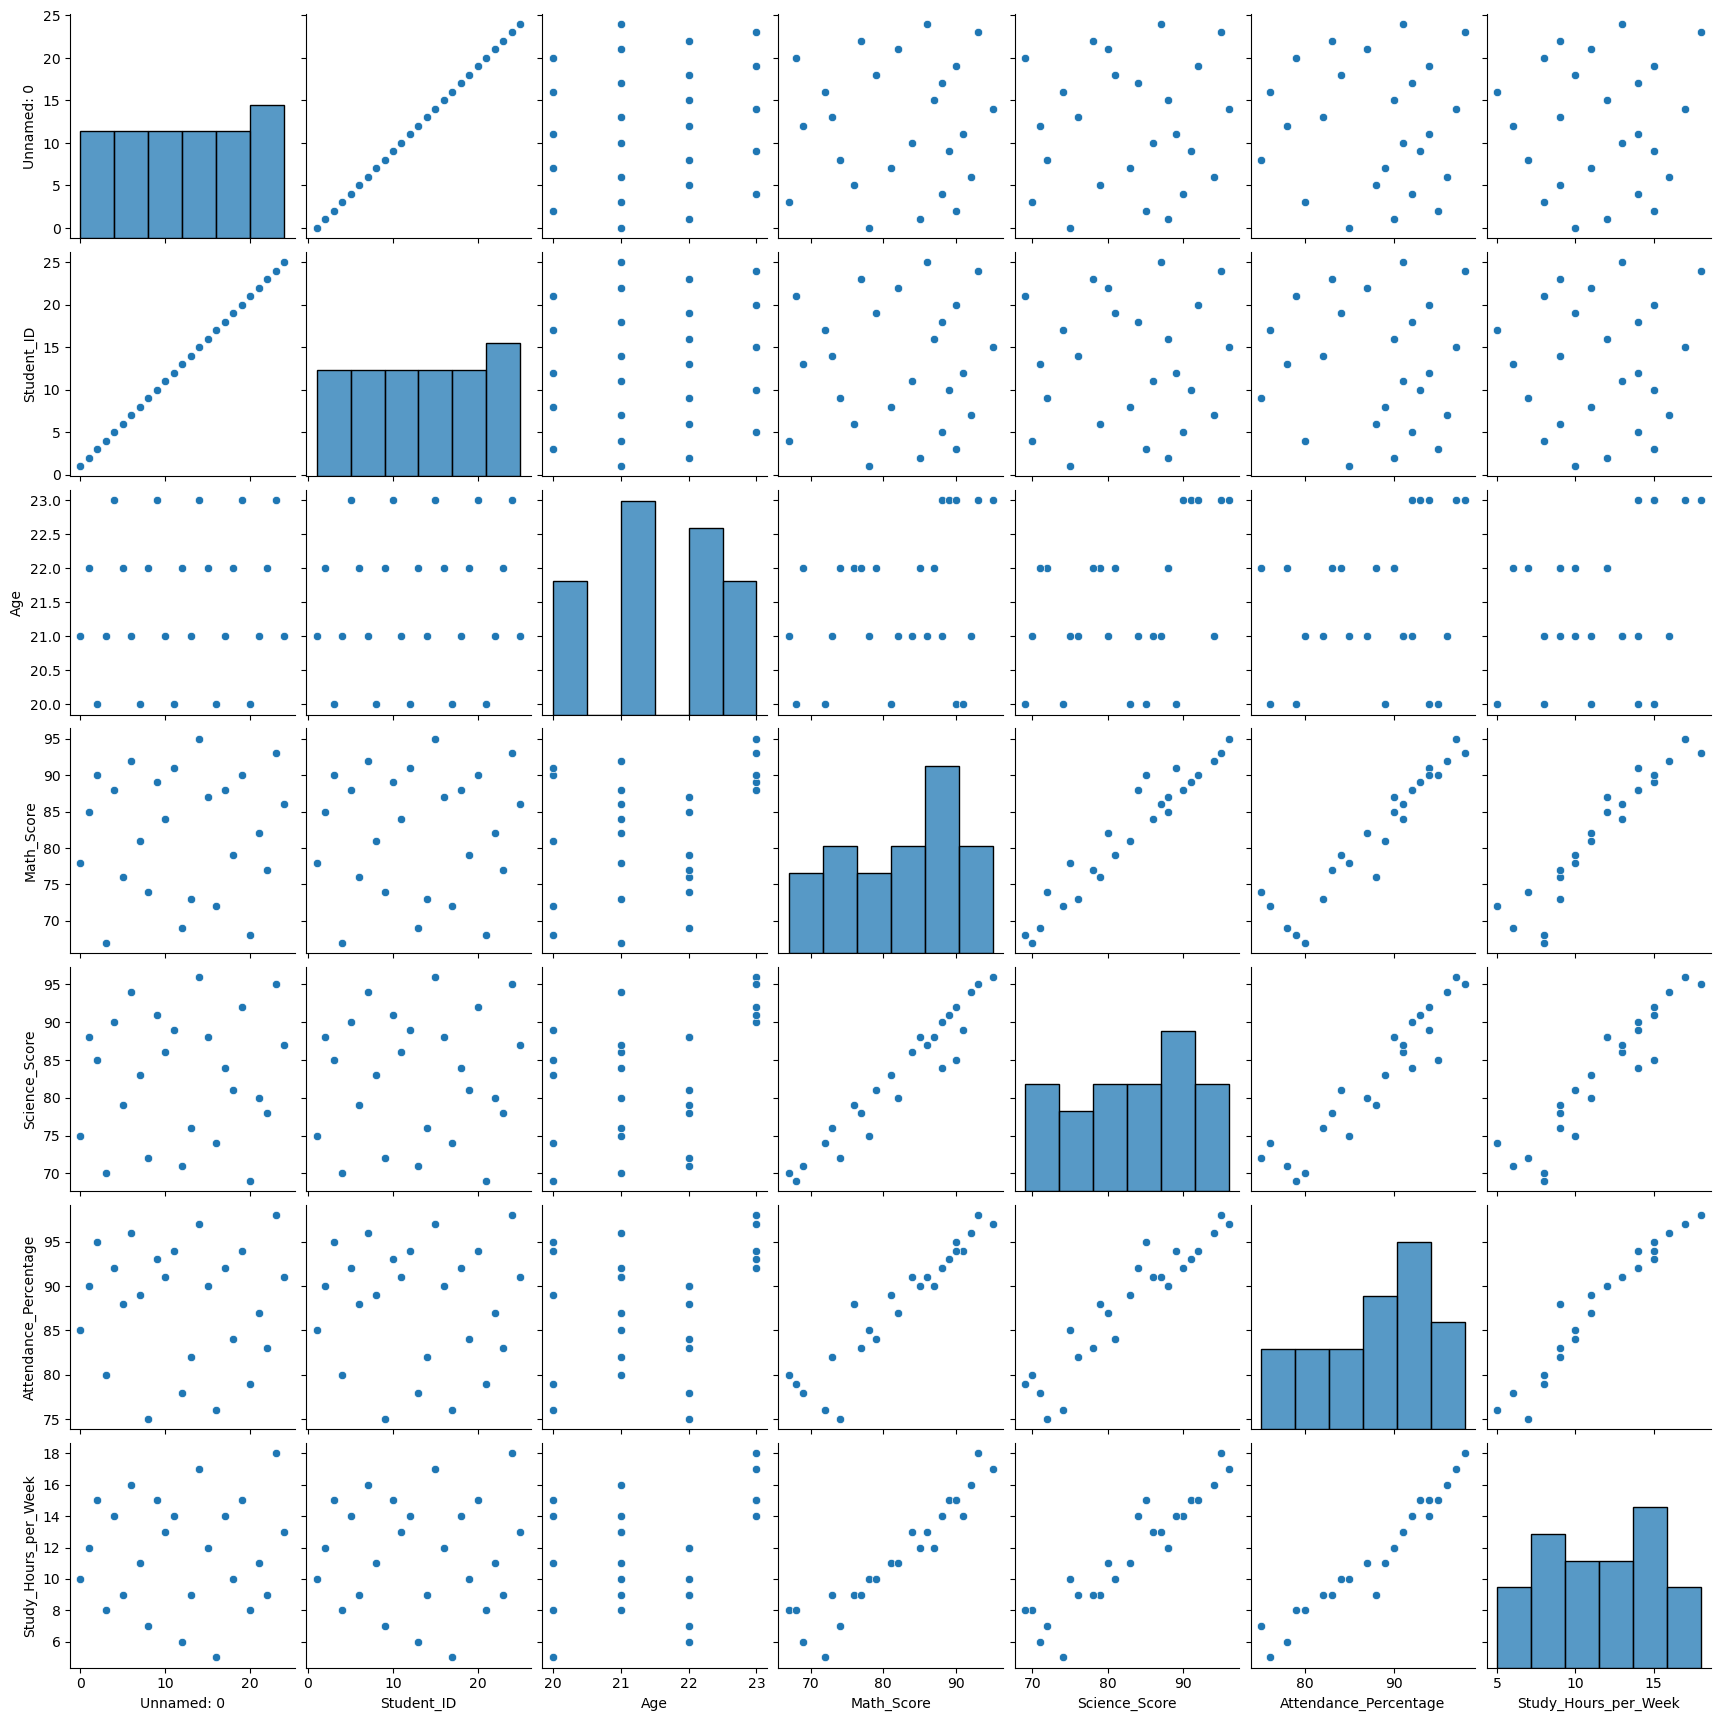

In [104]:
plt.figure()
sns.pairplot(data)

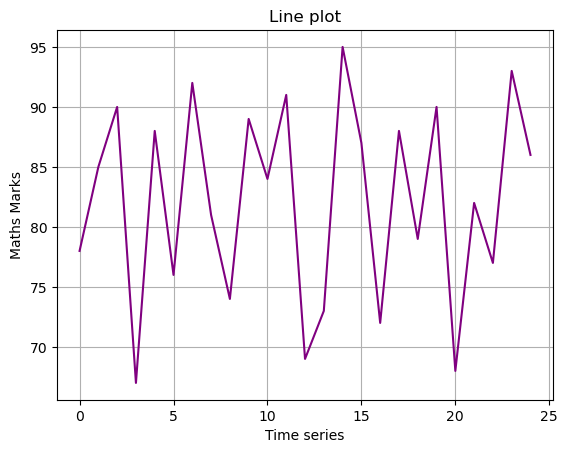

In [108]:
plt.plot(data.Math_Score , color="purple")
plt.grid()
plt.title("Line plot")
plt.xlabel("Time series")
plt.ylabel("Maths Marks")
plt.show()

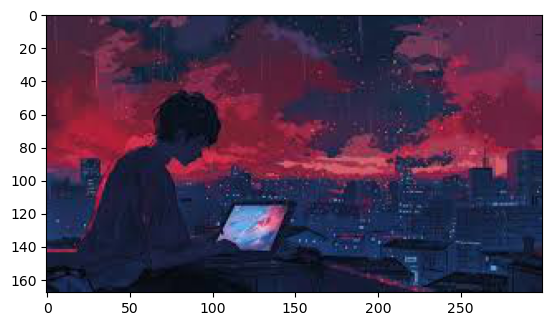

In [111]:
img = plt.imread(r"C:\Users\keert\OneDrive\Pictures\photo\download.jpg")
plt.imshow(img)

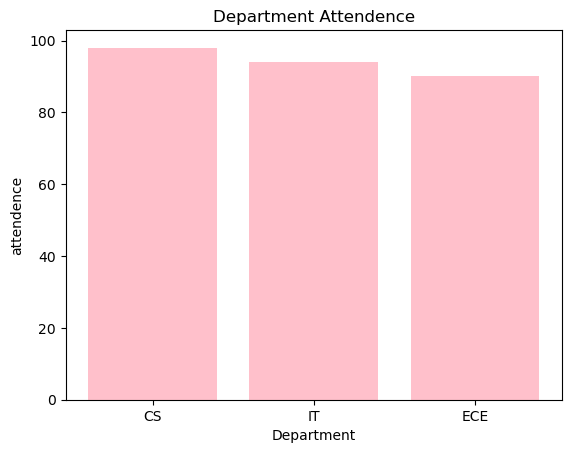

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(data.Department,data.Attendance_Percentage,color="Pink")
plt.title("Department Attendence")
plt.xlabel("Department")
plt.ylabel("attendence")
plt.show()

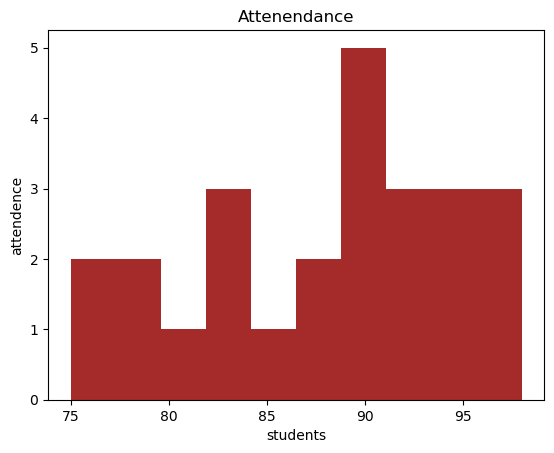

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(data.Attendance_Percentage,color="Brown")
plt.title("Attenendance")
plt.xlabel("students")
plt.ylabel("attendence")
plt.show()

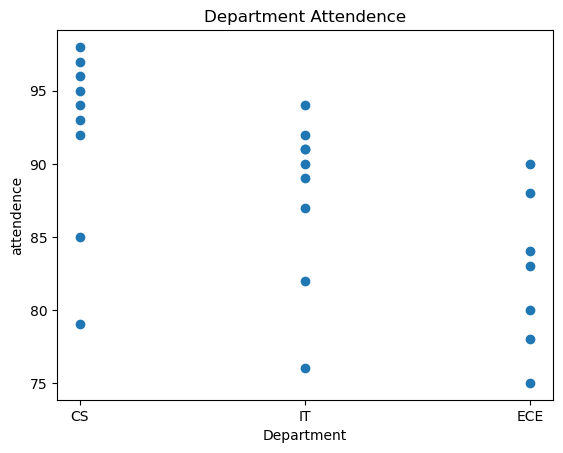

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(data.Department,data.Attendance_Percentage)
plt.title("Department Attendence")
plt.xlabel("Department")
plt.ylabel("attendence")
plt.show()

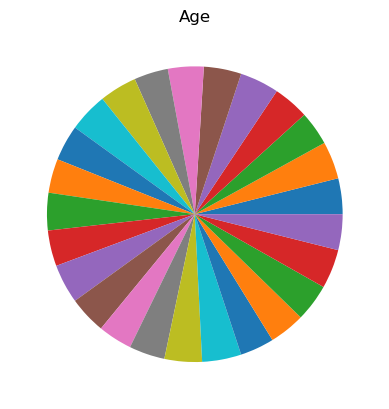

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(data.Age)
plt.title("Age")
plt.show()